# Importing the Data :

In [2]:
import pandas as pd
import numpy as np

In [3]:
!gdown 1QGmbEt2Tcg6bukkufvGKM3xRFnIr7jjl

Downloading...
From: https://drive.google.com/uc?id=1QGmbEt2Tcg6bukkufvGKM3xRFnIr7jjl
To: /content/drug200.csv
100% 5.83k/5.83k [00:00<00:00, 12.9MB/s]


# A) Making a Decision tree :

   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  drugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  drugY
Number of classes: 5
BP             3
Cholesterol    2
dtype: int64
     Age  Na_to_K  Drug  Sex_M  BP_LOW  BP_NORMAL  Cholesterol_NORMAL
0     23   25.355     4  False   False      False               False
1     47   13.093     2   True    True      False               False
2     47   10.114     2   True    True      False               False
3     28    7.798     3  False   False       True               False
4     61   18.043     4  False    True      False               False
..   ...      ...   ...    ...     ...        ...                 ...
195   56   11.567     2  False    True      False               False
196   16   12.006     2   True    True      False               False
197   52    9.894   

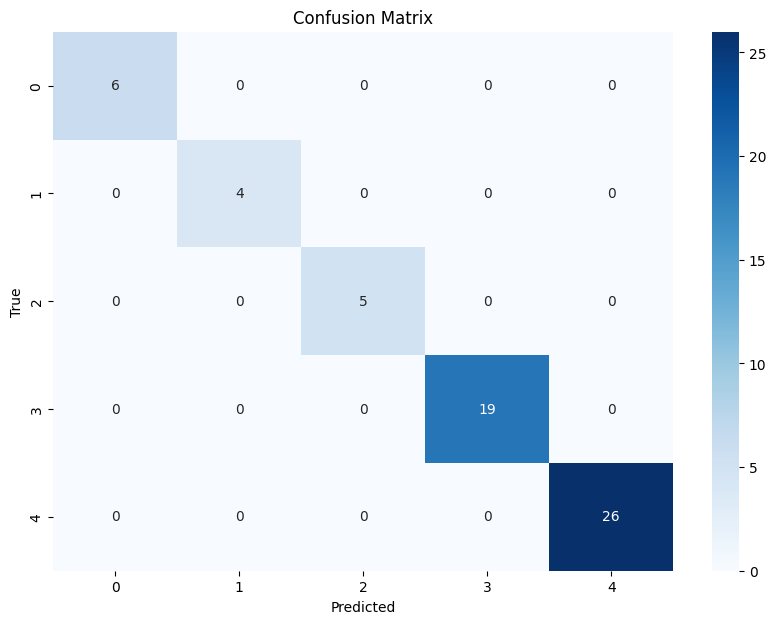

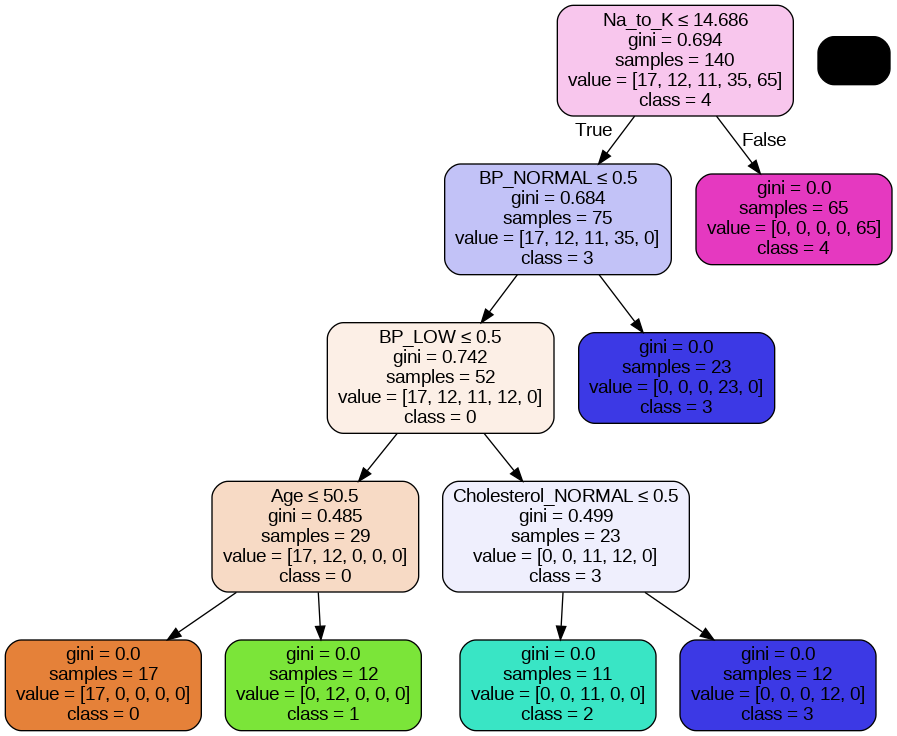

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import pydotplus
from IPython.display import Image

# Step 1: Load the data
data = pd.read_csv('drug200.csv')

# Display the first few rows of the dataset
print(data.head())

# Determine the number of unique classes in the label
label_column = 'Drug'  # Replace 'label' with the actual name of the label column
num_classes = data[label_column].nunique()
print(f"Number of classes: {num_classes}")
print(data[['BP' , 'Cholesterol']].nunique())

# Step 2: Convert categorical features to numerical using one-hot encoding
# Identify categorical columns (excluding the label column)
categorical_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_columns = [col for col in categorical_columns if col != label_column]

# Apply one-hot encoding to categorical columns
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Step 2.1: Ensure the label is also properly handled if it's categorical
if data[label_column].dtype == 'object' or data[label_column].dtype.name == 'category':
    data_encoded[label_column] = data[label_column].astype('category').cat.codes

print(data_encoded)
# Split the data into training and testing sets
features = data_encoded.drop(columns=[label_column])
labels = data_encoded[label_column]  # Ensure that labels remain intact
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=64)

# Step 3: Build a decision tree classifier
clf = DecisionTreeClassifier(random_state=64)
clf.fit(X_train, y_train)

# Step 4: Analyze the output
# Predict the classes for the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(conf_matrix)


# Visualization 2: Confusion matrix heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Visualization 1: Plot the decision tree
dot_data = export_graphviz(clf, out_file=None,
                           feature_names=features.columns,
                           class_names=[str(c) for c in clf.classes_],
                           filled=True, rounded=True,
                           special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# y=4 , x=3 ,

# B ) Decision tree With accuracy parameters :

   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  drugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  drugY
Number of classes: 5
BP             3
Cholesterol    2
dtype: int64
     Age  Na_to_K  Drug  Sex_M  BP_LOW  BP_NORMAL  Cholesterol_NORMAL
0     23   25.355     4  False   False      False               False
1     47   13.093     2   True    True      False               False
2     47   10.114     2   True    True      False               False
3     28    7.798     3  False   False       True               False
4     61   18.043     4  False    True      False               False
..   ...      ...   ...    ...     ...        ...                 ...
195   56   11.567     2  False    True      False               False
196   16   12.006     2   True    True      False               False
197   52    9.894   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

Effect of max_depth:
max_depth=2: Accuracy=0.7500, Precision=0.7786, Recall=0.7500, F1-score=0.7351


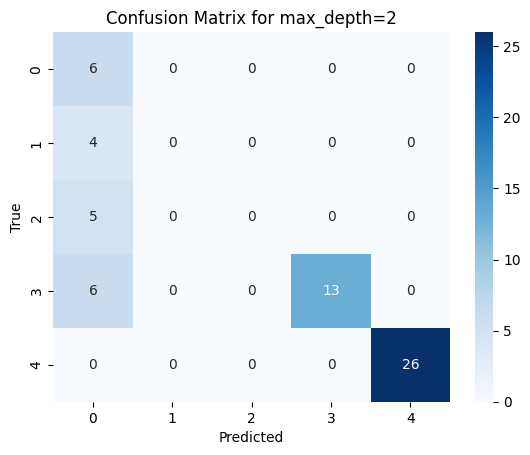

max_depth=3: Accuracy=0.8500, Precision=0.7440, Recall=0.8500, F1-score=0.7882


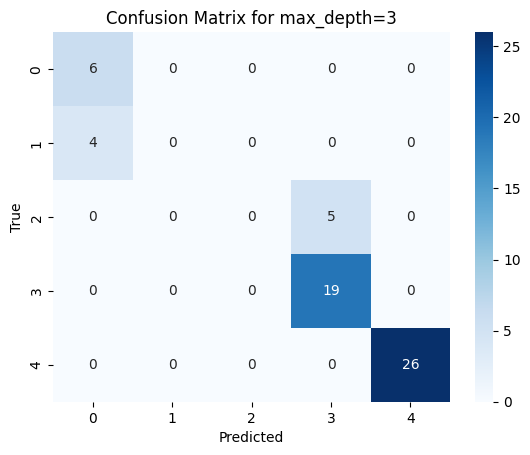

max_depth=4: Accuracy=1.0000, Precision=1.0000, Recall=1.0000, F1-score=1.0000


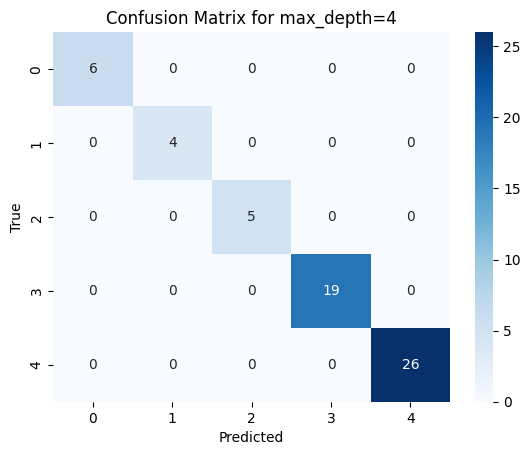

max_depth=5: Accuracy=1.0000, Precision=1.0000, Recall=1.0000, F1-score=1.0000


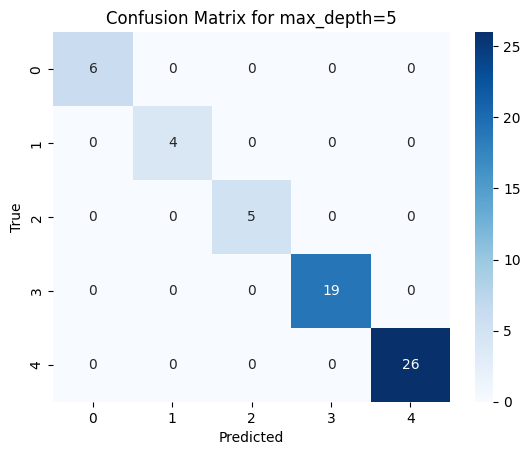

Effect of min_samples_split:
min_samples_split=20: Accuracy=1.0000, Precision=1.0000, Recall=1.0000, F1-score=1.0000


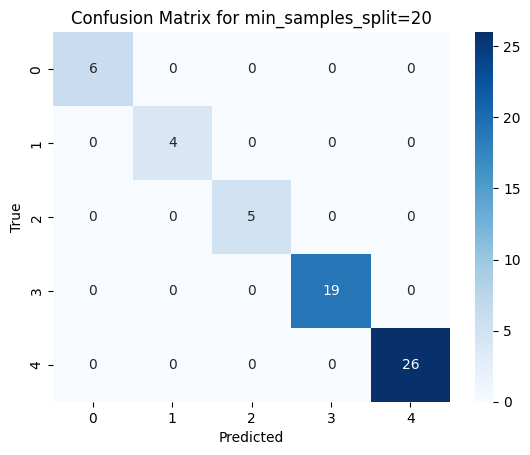

min_samples_split=30: Accuracy=0.8500, Precision=0.7440, Recall=0.8500, F1-score=0.7882


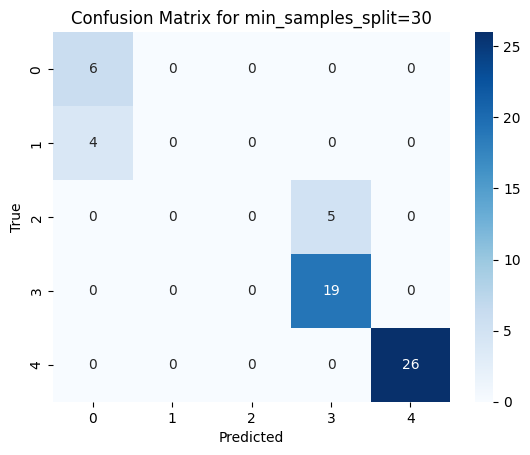

min_samples_split=40: Accuracy=0.8500, Precision=0.7440, Recall=0.8500, F1-score=0.7882


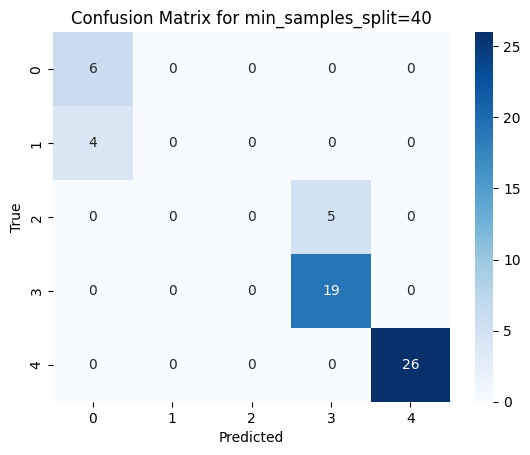

min_samples_split=50: Accuracy=0.8500, Precision=0.7440, Recall=0.8500, F1-score=0.7882


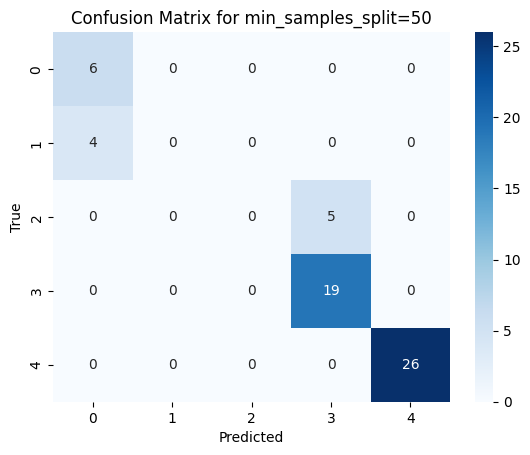

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import pydotplus
from IPython.display import Image

# Step 1: Load the data
data = pd.read_csv('drug200.csv')

# Display the first few rows of the dataset
print(data.head())

# Determine the number of unique classes in the label
label_column = 'Drug'  # Replace 'label' with the actual name of the label column
num_classes = data[label_column].nunique()
print(f"Number of classes: {num_classes}")
print(data[['BP' , 'Cholesterol']].nunique())

# Step 2: Convert categorical features to numerical using one-hot encoding
# Identify categorical columns (excluding the label column)
categorical_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_columns = [col for col in categorical_columns if col != label_column]

# Apply one-hot encoding to categorical columns
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Step 2.1: Ensure the label is also properly handled if it's categorical
if data[label_column].dtype == 'object' or data[label_column].dtype.name == 'category':
    data_encoded[label_column] = data[label_column].astype('category').cat.codes

print(data_encoded)
# Split the data into training and testing sets
features = data_encoded.drop(columns=[label_column])
labels = data_encoded[label_column]  # Ensure that labels remain intact
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=64)


def evaluate_model(clf, X_test, y_test):
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    return accuracy, precision, recall, f1, conf_matrix

# Test different values of max_depth
depths = [2,3 ,4, 5]
results_depth = []

for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=64)
    clf.fit(X_train, y_train)
    results_depth.append((depth, *evaluate_model(clf, X_test, y_test)))

# Test different values of min_samples_split
splits = [20, 30, 40, 50]
results_split = []

for split in splits:
    clf = DecisionTreeClassifier(min_samples_split=split, random_state=64)
    clf.fit(X_train, y_train)
    results_split.append((split, *evaluate_model(clf, X_test, y_test)))

# Display the results
print("Effect of max_depth:")
for depth, accuracy, precision, recall, f1, conf_matrix in results_depth:
    print(f"max_depth={depth}: Accuracy={accuracy:.4f}, Precision={precision:.4f}, Recall={recall:.4f}, F1-score={f1:.4f}")
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Confusion Matrix for max_depth={depth}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

print("Effect of min_samples_split:")
for split, accuracy, precision, recall, f1, conf_matrix in results_split:
    print(f"min_samples_split={split}: Accuracy={accuracy:.4f}, Precision={precision:.4f}, Recall={recall:.4f}, F1-score={f1:.4f}")
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Confusion Matrix for min_samples_split={split}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# C ) Random Forest Classifier :

   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  drugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  drugY
Number of classes: 5
BP             3
Cholesterol    2
dtype: int64
     Age  Na_to_K  Drug  Sex_M  BP_LOW  BP_NORMAL  Cholesterol_NORMAL
0     23   25.355     4  False   False      False               False
1     47   13.093     2   True    True      False               False
2     47   10.114     2   True    True      False               False
3     28    7.798     3  False   False       True               False
4     61   18.043     4  False    True      False               False
..   ...      ...   ...    ...     ...        ...                 ...
195   56   11.567     2  False    True      False               False
196   16   12.006     2   True    True      False               False
197   52    9.894   

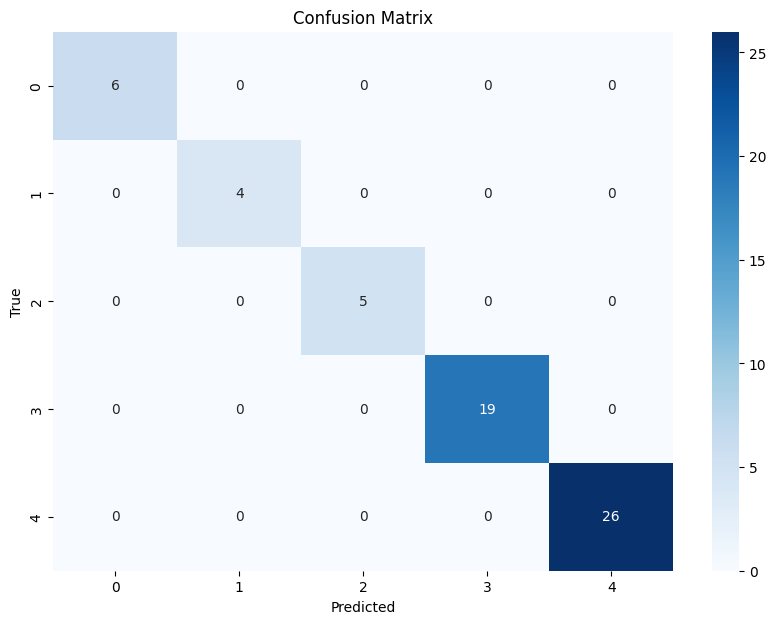

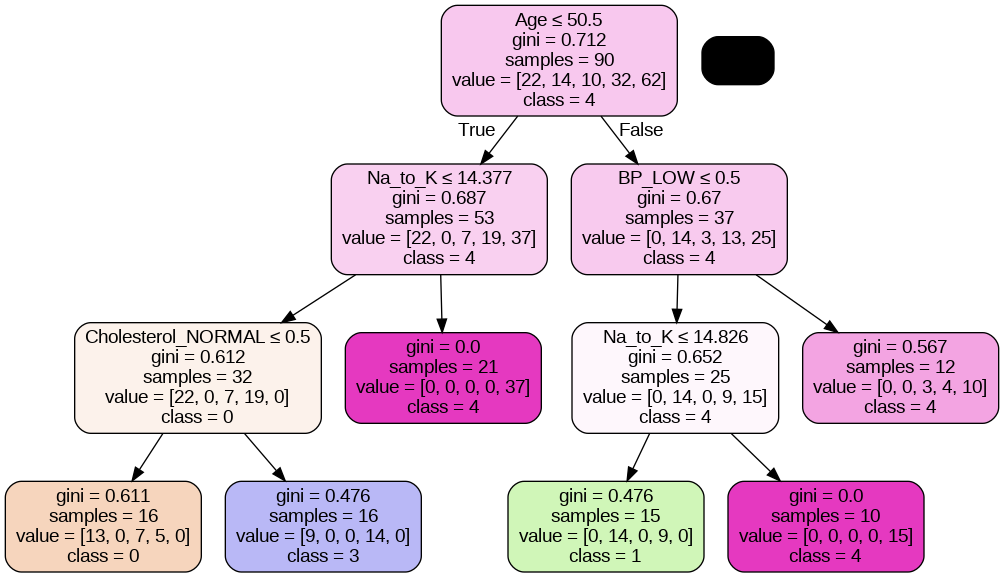

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import  RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import pydotplus
from IPython.display import Image

# Step 1: Load the data
data = pd.read_csv('drug200.csv')

# Display the first few rows of the dataset
print(data.head())

# Determine the number of unique classes in the label
label_column = 'Drug'  # Replace 'label' with the actual name of the label column
num_classes = data[label_column].nunique()
print(f"Number of classes: {num_classes}")
print(data[['BP' , 'Cholesterol']].nunique())

# Step 2: Convert categorical features to numerical using one-hot encoding
# Identify categorical columns (excluding the label column)
categorical_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_columns = [col for col in categorical_columns if col != label_column]

# Apply one-hot encoding to categorical columns
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Step 2.1: Ensure the label is also properly handled if it's categorical
if data[label_column].dtype == 'object' or data[label_column].dtype.name == 'category':
    data_encoded[label_column] = data[label_column].astype('category').cat.codes

print(data_encoded)
# Split the data into training and testing sets
features = data_encoded.drop(columns=[label_column])
labels = data_encoded[label_column]  # Ensure that labels remain intact
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=64)

# Step 3: Build a decision tree classifier
clf = RandomForestClassifier(random_state=64 , n_estimators = 20, max_depth = 5 , min_samples_split =20)
clf.fit(X_train, y_train)

# Step 4: Analyze the output
# Predict the classes for the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(conf_matrix)

# Visualization 2: Confusion matrix heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Visualization 1: Plot the decision tree
dot_data = export_graphviz(clf.estimators_[0], out_file=None,
                           feature_names=features.columns,
                           class_names=[str(c) for c in clf.classes_],
                           filled=True, rounded=True,
                           special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())
